In [1]:
import pandas as pd
import matplotlib.pyplot as plt 
import mplstereonet as mpl
import numpy as np
from matplotlib.patches import Rectangle
from scipy.interpolate import interp1d
from matplotlib.gridspec import GridSpec

In [2]:
!sh runquery.sh

'sh' is not recognized as an internal or external command,
operable program or batch file.


In [3]:
data_106 = pd.read_csv("../outputs/resume_explorations_106.csv")
data_106.index = pd.to_datetime(data_106["EXPLO_DATE"])

data_107 = pd.read_csv("../outputs/resume_explorations_107.csv")
data_107.index = pd.to_datetime(data_107["EXPLO_DATE"])

data_glaciers = pd.read_csv("../outputs/resume_explorations_glaciers.csv")
data_glaciers.index = pd.to_datetime(data_glaciers["EXPLO_DATE"])


FileNotFoundError: [Errno 2] No such file or directory: '../outputs/resume_explorations_106.csv'

In [4]:
data = pd.read_csv("../outputs/resume_explorations.csv")
data.index = pd.to_datetime(data["EXPLO_DATE"])

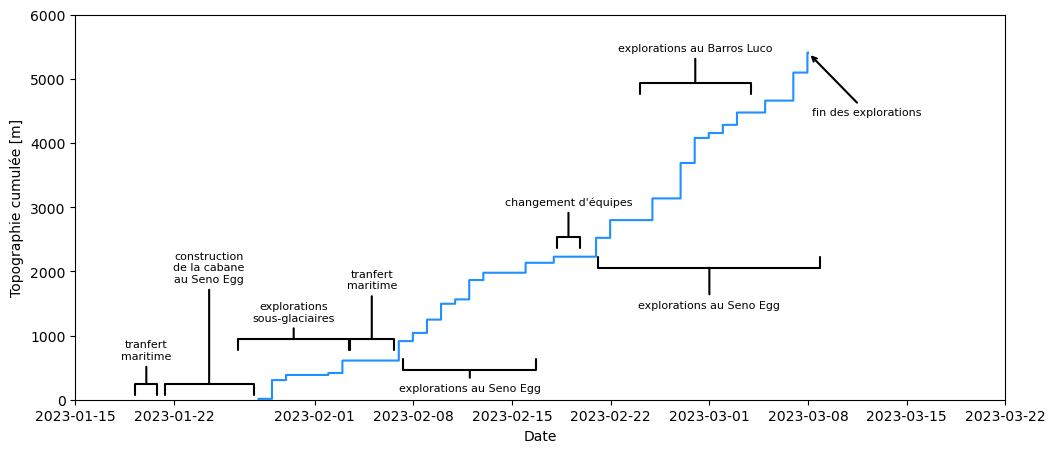

In [5]:
fig, ax = plt.subplots(figsize = (12,5))

start = pd.to_datetime("2023-01-17")
end = pd.to_datetime("2023-03-31")

yi = data[start:end]["LENGTH"].cumsum().resample("H").mean().fillna(method='ffill')
xi = yi.index

ax.step(xi,yi, color = "dodgerblue")
yi0 = pd.Series(yi*0)



ax.annotate("changement d'équipes",
            xy=(pd.to_datetime("2023-02-19"),2500),
            xytext=(pd.to_datetime("2023-02-19"),3000), 
            xycoords='data',
            fontsize=8, ha='center', va='bottom',
            arrowprops=dict(arrowstyle='-[, widthB=1.0, lengthB=1', lw=1.5))

ax.annotate("explorations au Seno Egg",
            xy=(pd.to_datetime("2023-03-01"),2100),
            xytext=(pd.to_datetime("2023-03-01"),1400), 
            xycoords='data',
            fontsize=8, ha='center', va='bottom',
            arrowprops=dict(arrowstyle='-[, widthB=10.0, lengthB=1', lw=1.5))


ax.annotate("explorations au Barros Luco",
            xy=(pd.to_datetime("2023-02-28"),4900),
            xytext=(pd.to_datetime("2023-02-28"),5400), 
            xycoords='data',
            fontsize=8, ha='center', va='bottom',
            arrowprops=dict(arrowstyle='-[, widthB=5.0, lengthB=1', lw=1.5))


ax.annotate("explorations au Seno Egg",
            xy=(pd.to_datetime("2023-02-12"),500),
            xytext=(pd.to_datetime("2023-02-12"),100), 
            xycoords='data',
            fontsize=8, ha='center', va='bottom',
            arrowprops=dict(arrowstyle='-[, widthB=6.0, lengthB=1', lw=1.5))

ax.annotate("construction\nde la cabane\nau Seno Egg",
            xy=(pd.to_datetime("2023-01-24 12:00"),200),
            xytext=(pd.to_datetime("2023-01-24 12:00"),1800), 
            xycoords='data',
            fontsize=8, ha='center', va='bottom',
            arrowprops=dict(arrowstyle='-[, widthB=4.0, lengthB=1', lw=1.5))

ax.annotate("explorations\nsous-glaciaires",
            xy=(pd.to_datetime("2023-01-30 12:00"),900),
            xytext=(pd.to_datetime("2023-01-30 12:00"),1200), 
            xycoords='data',
            fontsize=8, ha='center', va='bottom',
            arrowprops=dict(arrowstyle='-[, widthB=5.0, lengthB=1', lw=1.5))


ax.annotate("tranfert\nmaritime",
            xy=(pd.to_datetime("2023-02-05 1:00"),900),
            xytext=(pd.to_datetime("2023-02-05 1:00"),1700), 
            xycoords='data',
            fontsize=8, ha='center', va='bottom',
            arrowprops=dict(arrowstyle='-[, widthB=2.0, lengthB=1', lw=1.5))

ax.annotate("tranfert\nmaritime",
            xy=(pd.to_datetime("2023-01-20 1:00"),200),
            xytext=(pd.to_datetime("2023-01-20 1:00"),600), 
            xycoords='data',
            fontsize=8, ha='center', va='bottom',
            arrowprops=dict(arrowstyle='-[, widthB=1, lengthB=1', lw=1.5))


ax.annotate("fin des explorations",
            xy=(pd.to_datetime("2023-03-08 1:00"),5400),
            xytext=(pd.to_datetime("2023-03-16 1:00"),4400), 
            xycoords='data',
            fontsize=8, ha='right', va='bottom',
            arrowprops=dict(arrowstyle='->, widthB=1, lengthB=1', lw=1.5))


ax.set_xlabel("Date")
ax.set_ylabel("Topographie cumulée [m]")
ax.set_ylim(0,6000)
ax.set_xlim(pd.to_datetime("2023-01-15"),pd.to_datetime("2023-03-22"))
ax.spines["top"].set_visible("False")
ax.spines["right"].set_visible("False")

plt.savefig("topographie_cumulée.pdf",dpi = 300)
plt.show()

In [6]:
CuevaPiratesShots = pd.read_csv("../outputs/resume_explorations_Pirates.csv")

FileNotFoundError: [Errno 2] No such file or directory: '../outputs/resume_explorations_Pirates.csv'

In [7]:
CuevaPiratesShots

NameError: name 'CuevaPiratesShots' is not defined

In [8]:
strikes = []
dips = []
for c,sh in CuevaPiratesShots.iterrows():
    strikes+= int(sh.ADJ_LENGTH)*[sh.ADJ_BEARING]
    dips += int(sh.ADJ_LENGTH)*[sh.ADJ_GRADIENT]




NameError: name 'CuevaPiratesShots' is not defined

In [9]:
dips_pos  = np.array(dips)[np.array(dips) > 0]
dips_neg =  - np.array(dips)[np.array(dips) <= 0]
strikes_pos = np.array(strikes)[np.array(dips) > 0] - 180
strikes_neg = np.array(strikes)[np.array(dips) <= 0]

In [10]:
adj_strikes = np.concatenate([strikes_neg, strikes_pos])
adj_dips = np.concatenate([dips_neg, dips_pos])

c:\Users\tangr\anaconda3\Lib\site-packages\numpy\lib\function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
c:\Users\tangr\anaconda3\Lib\site-packages\numpy\core\_methods.py:184: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(
c:\Users\tangr\anaconda3\Lib\site-packages\mplstereonet\analysis.py:205: RuntimeWarning: Degrees of freedom <= 0 for slice
  cov = np.cov(xyz.T)
c:\Users\tangr\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\tangr\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)


LinAlgError: Eigenvalues did not converge

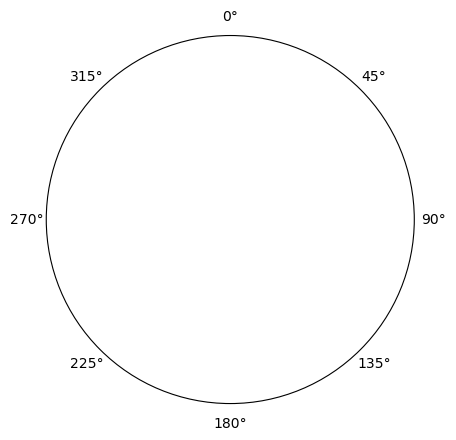

In [11]:
fig = plt.figure(figsize=(6,6))

gs = GridSpec(10,10)
ax = fig.add_subplot(gs[1:-1,1:-1], projection='stereonet')
strike, dip = mpl.fit_girdle(adj_strikes+90, 90-adj_dips)

print(strike)
print(dip)
ax.plane(strike,dip, c = "grey")
ax.line(dip,strike+90,c="red")
ax.line(adj_dips,adj_strikes, markersize="1", c = "grey", label = "visées", alpha = 0.5)
ax.density_contourf(adj_strikes+90, 90-adj_dips, measurement='poles', cmap='Blues')

ax.grid()
ax.set_azimuth_ticks([])
ax.set_azimuth_ticks(angles = [0,45,90, 135, 180, 225, 270, 315], 
                     labels = ["000°","045°","090°", "135°", "180°", "225°", "270°", "315°"], 
                     frac = 0.5)
#ax.set_azimuth_ticklabels(ax,)


ax.set_position([0.1, 0.1, 0.8, 0.8],"original")

ax.annotate(xy=(0.31,0.75),
            xytext=(0.05,0.92),
            text="orientation du plan\ncontenant la majorité des galeries",
            xycoords="figure fraction",
            arrowprops=dict(arrowstyle='->, widthB=1, lengthB=1', lw=1.5)
           )


ax.annotate(xy=(0.61,0.75),
            xytext=(0.55,0.92),
            text="chaque point gris \ncorrespond à une visée",
            xycoords="figure fraction",
            arrowprops=dict(arrowstyle='->, widthB=1, lengthB=1', lw=1.5)
           )

ax.annotate(xy=(0.3,0.69),
            text="312°/24°",
            xycoords="figure fraction",bbox=dict(boxstyle="round", fc="w"))

plt.savefig("stereonet_plot.pdf", dpi = 300)

plt.show()

In [12]:
# only plot the depth histogram of all discovered passages... 
allShots = pd.read_csv("../outputs/allShots.csv")

FileNotFoundError: [Errno 2] No such file or directory: '../outputs/allShots.csv'

In [13]:
PhreaticShots = allShots.query("ADJ_GRADIENT  < 20 ")
PhreaticLength = np.ceil(PhreaticShots["ADJ_LENGTH"]).astype(int)

NameError: name 'allShots' is not defined

In [14]:
VadoseShots = allShots.query("ADJ_GRADIENT  >= 20 ")
VadoseLength = np.ceil(VadoseShots["ADJ_LENGTH"]).astype(int)

NameError: name 'allShots' is not defined

In [15]:
lengths = np.ceil(allShots["ADJ_LENGTH"]).astype(int)


# distribute point heights for centrelines.
metres = np.concatenate([np.linspace(z1,z2,n+1) for z1,z2,n in zip(allShots["Z"],allShots["Z.1"],lengths)])
phreatic_metres = np.concatenate([np.linspace(z1,z2,n+1) for z1,z2,n in zip(PhreaticShots["Z"],PhreaticShots["Z.1"],PhreaticLength)])
vadose_metres = np.concatenate([np.linspace(z1,z2,n+1) for z1,z2,n in zip(VadoseShots["Z"],VadoseShots["Z.1"],VadoseLength)])

NameError: name 'allShots' is not defined

NameError: name 'metres' is not defined

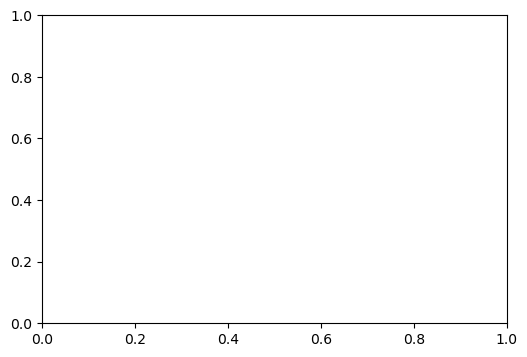

In [16]:
fig, ax = plt.subplots(figsize = (6,4))


vals, bins = np.histogram(metres, bins = np.arange(-50,650,10))

ax.barh(y = bins[0:-1], width = vals, height = 8, color = "k")

ax.set_ylabel("Altitude [m]")

ax.set_xlabel("Total de Galeries topographiées [m]")

Water = Rectangle((0,-100),4000,100, facecolor = "dodgerblue",edgecolor="None",alpha = 0.5, zorder = -99)
ax.add_patch(Water)
ax.set_ylim(-100,700)
ax.set_xlim(0,4000)
plt.savefig("DepthHistogram.pdf", dpi= 300)
plt.show()